## General Comparison

In [44]:
import pandas as pd

bing_RR = pd.read_excel("../results/Bing_RR_merged.xlsx")
bing_snip = pd.read_excel("../results/Bing_SERP_merged.xlsx")
google_RR = pd.read_excel("../results/Google_RR_merged.xlsx")
google_snip = pd.read_excel("../results/Google_SERP_merged.xlsx")
gemini = pd.read_excel("../results/gemini_merged.xlsx")
gpt = pd.read_excel("../results/ChatGPT_merged.xlsx")

In [45]:
merged_df = pd.concat([google_snip, google_RR, bing_snip, bing_RR, gemini, gpt], ignore_index=True)
merged_df

,query,ngram,domain_specific,ratio_paras,ratio_list_items,ratio_headings,avg_para_len,num_sentences,avg_len,flesch,cli,avg_concrete,concrete_ratio,abstract_ratio,undefined_ratio,response_group,response_group_type
0,adhd,1,True,0.68,0.00,0.32,16.00,3.71,9.87,28.06,16.30,2.32,0.03,0.41,0.56,Google SERP,SERP
1,adult,1,False,0.64,0.00,0.36,13.22,3.00,9.43,65.69,10.67,2.43,0.07,0.35,0.58,Google SERP,SERP
2,age,1,False,0.70,0.00,0.30,16.19,4.12,9.08,44.93,13.36,2.39,0.02,0.45,0.53,Google SERP,SERP
3,anxiety,1,False,0.75,0.00,0.25,15.94,4.33,7.83,42.54,12.88,2.19,0.02,0.49,0.49,Google SERP,SERP
4,asd,1,False,0.59,0.02,0.39,13.00,2.88,10.16,46.14,15.00,2.14,0.01,0.40,0.59,Google SERP,SERP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,word,1,False,1.00,0.00,0.00,24.00,2.00,12.00,67.76,7.70,2.53,0.15,0.65,0.20,GPT 3.5,Chatbot
1496,work,1,False,1.00,0.00,0.00,70.00,3.00,23.33,22.45,13.12,2.21,0.03,0.78,0.19,GPT 3.5,Chatbot
1497,world,1,False,1.00,0.00,0.00,90.00,5.00,18.00,44.75,14.56,2.25,0.06,0.66,0.28,GPT 3.5,Chatbot
1498,world autism acceptance day,4,True,1.00,0.00,0.00,54.33,6.00,27.17,26.95,16.13,2.25,0.04,0.68,0.28,GPT 3.5,Chatbot


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

import os

def plot_boxplot_gen(x, y, x_groups, x_name, y_name, foldername, is_y_ratio):
    # data_df = merged_df.loc[merged_df[x].isin(x_groups)]
    data_df = merged_df

    if y == 'avg_para_len':
        if "Bing RR" in x_groups or "RR" in x_groups:
            idx = data_df.loc[(data_df['response_group']=='Bing RR') & (data_df['avg_para_len']>=500)].index
            data_df = data_df.drop(idx)
            print(idx)
    elif y== 'cli':
        if "GPT 3.5" in x_groups or "Chatbot" in x_groups:
            idx = data_df.loc[(data_df["response_group_type"]=="Chatbot") & (data_df['cli'] > 40)].index
            data_df = data_df.drop(idx)
            print(idx)
        
    fig = plt.figure()
    ax = sns.violinplot(x=x, y=y, data=data_df, inner='box', hue=x, legend="full")
    # ax = sns.violinplot(y=y, data=data_df, inner='box', hue='response_group')

    if y == 'cli':
        ax.axhline(8, ls='--', color='r')
    if y == 'flesch':
        ax.axhline(65, ls='--', color='r')
    
    
    plt.xlabel(None)
    plt.xticks([],[])
    plt.ylabel(None)
    if is_y_ratio == True:
        plt.ylim(-0.1, 1.1)
    if y == 'num_sentences' or y=='avg_para_len' or y=='avg_len':
        plt.ylim(bottom = -1)

    if not os.path.exists("../figures/" + foldername):
        os.makedirs("../figures/" + foldername)

    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.3), ncol=len(x_groups)//2)
    plt.savefig("../figures/" + foldername + "/" + y + ".pdf", dpi=300, bbox_inches='tight')
    # plt.close()
    plt.show()

def gen_comparison(group_type, groups, x_name, folder_name):
    markers = [
        "ratio_paras",
        "ratio_list_items",
        "ratio_headings",
        "avg_para_len",
        "num_sentences",
        "avg_len",
        "flesch",
        "cli",
        "avg_concrete",
        "concrete_ratio",
        "abstract_ratio",
        "undefined_ratio"
    ]

    marker_names = [
        "Ratio of paragraphs",
        "Ratio of list items",
        "Ratio of headings",
        "Average paragraph length",
        "Number of sentences",
        "Average sentence length",
        "Flesch Reading Ease score",
        "Coleman-Liau Readability index",
        "Average Concreteness",
        "Ratio of concrete words",
        "Ratio of abstract words",
        "Ratio of non-rated words"
    ]

    ratios = [
        "Ratio of paragraphs",
        "Ratio of list items",
        "Ratio of headings",
        "Ratio of concrete words",
        "Ratio of abstract words",
        "Ratio of non-rated words"
    ]

    for marker, marker_name in zip(markers, marker_names):
        # folder_name = "_".join(["_".join(group.split()) for group in groups])
        if marker_name in ratios:
            is_marker_ratio = True
        else:
            is_marker_ratio = False
        plot_boxplot_gen(x = group_type, y = marker, x_groups = groups, x_name=x_name, y_name=marker_name, foldername = folder_name, is_y_ratio=is_marker_ratio)

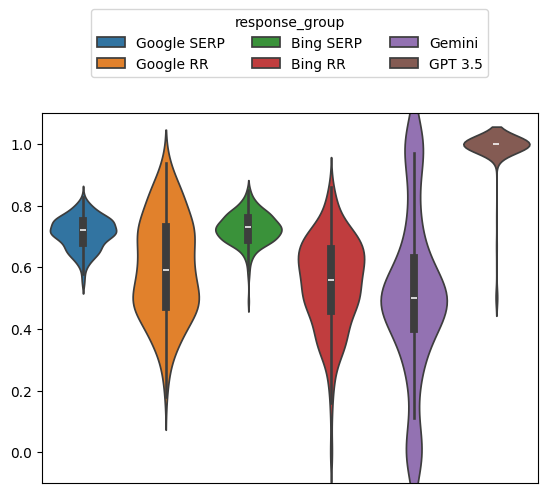

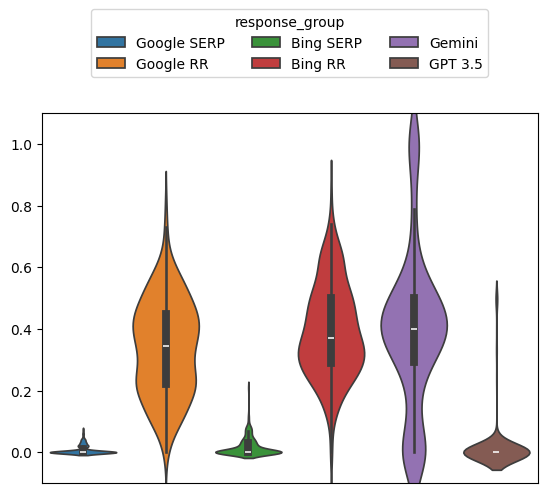

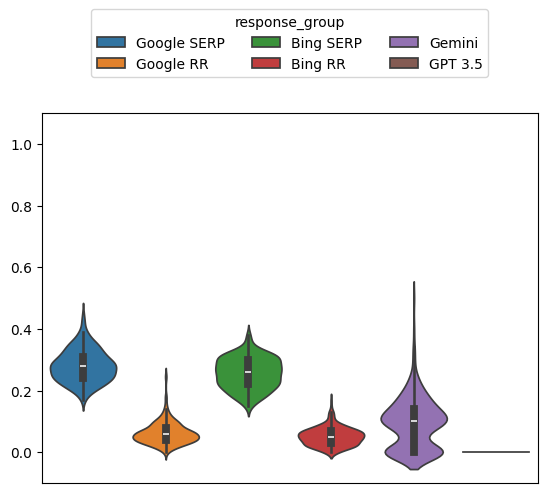

Index([973], dtype='int64')


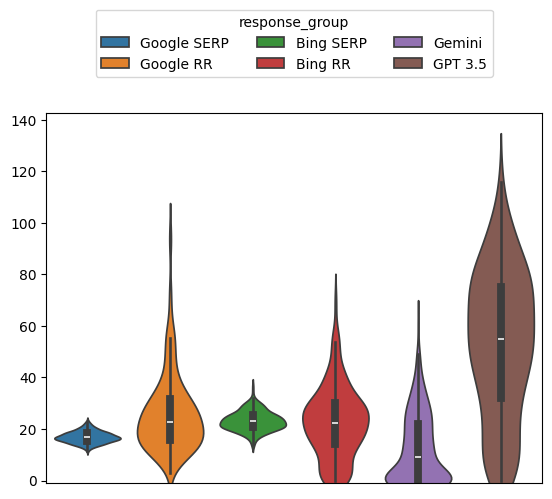

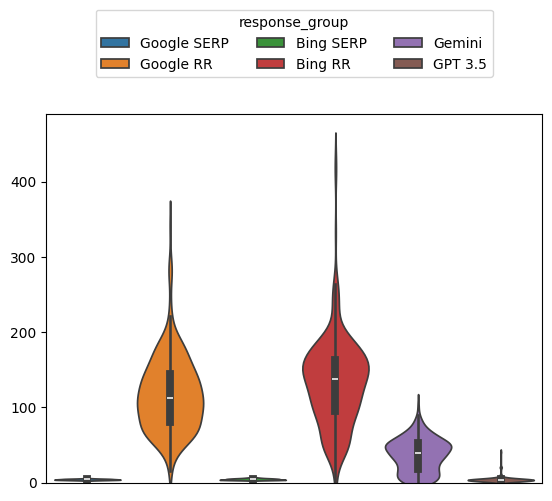

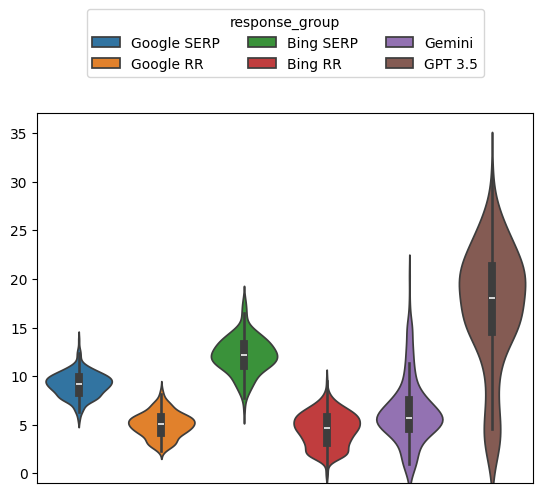

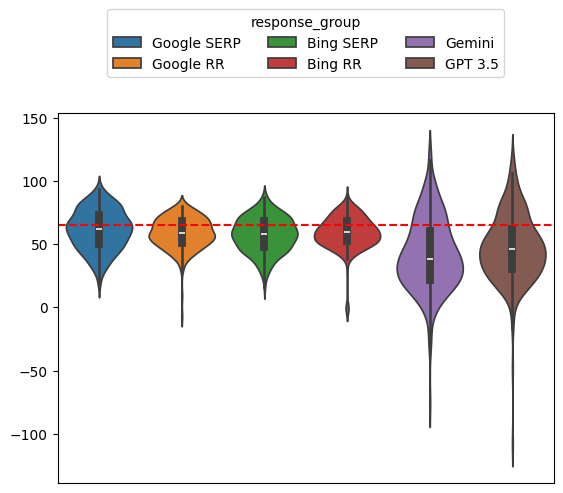

Index([1407], dtype='int64')


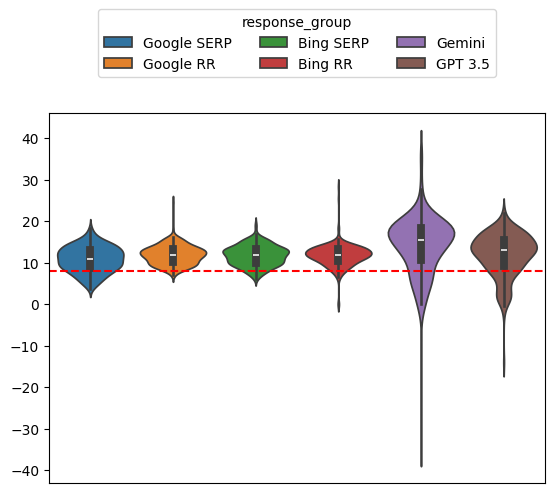

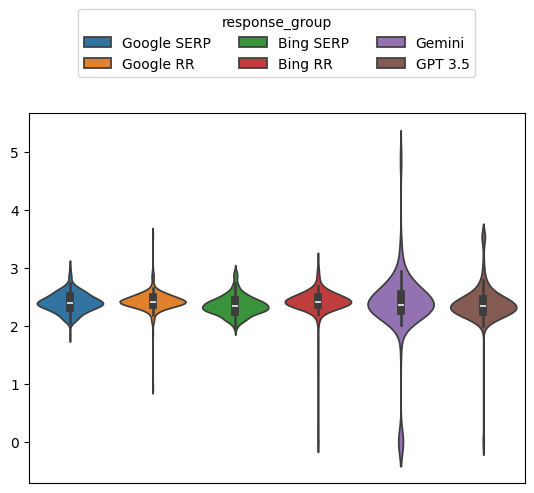

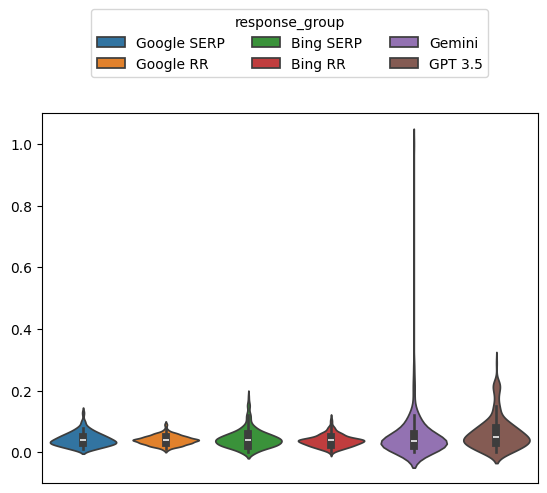

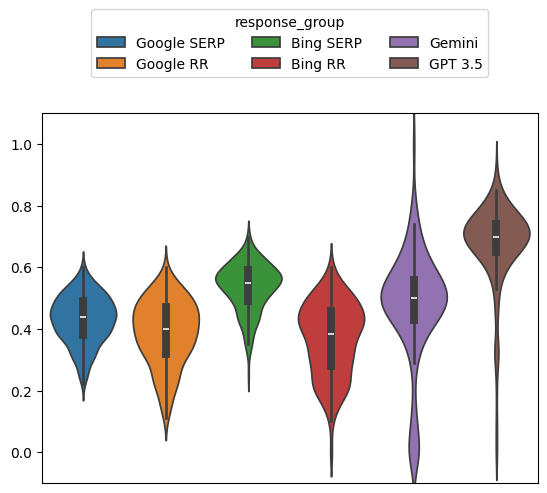

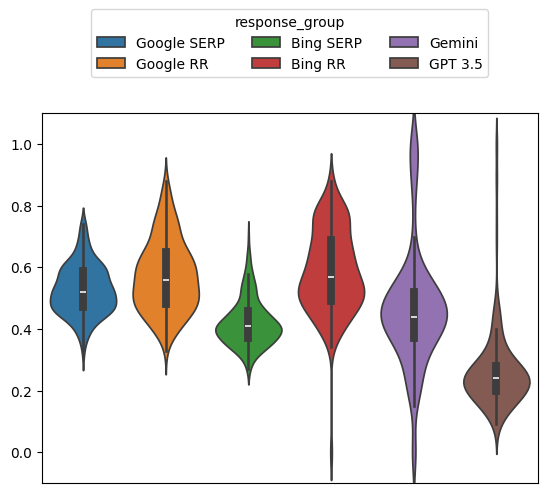

In [47]:
gen_comparison(group_type='response_group', groups=["Google SERP", "Bing SERP", "Google RR", "Bing RR", "Gemini", "GPT 3.5"], x_name='Log', folder_name="IAS_comparison")

## Control vs Target

In [48]:
import pandas as pd

bing_RR_control = pd.read_excel("../results/Control_Bing_RR_merged.xlsx")
bing_snip_control = pd.read_excel("../results/Control_Bing_SERP_merged.xlsx")
google_RR_control = pd.read_excel("../results/Control_Google_RR_merged.xlsx")
google_snip_control = pd.read_excel("../results/Control_Google_SERP_merged.xlsx")
gemini_control = pd.read_excel("../results/Control_gemini_merged.xlsx")
gpt_control = pd.read_excel("../results/Control_ChatGPT_merged.xlsx")

control_df = pd.concat([google_snip_control, google_RR_control, bing_snip_control, bing_RR_control, gemini_control, gpt_control], ignore_index=True)

bing_RR_target = pd.read_excel("../results/Bing_RR_merged.xlsx")
bing_snip_target = pd.read_excel("../results/Bing_SERP_merged.xlsx")
google_RR_target = pd.read_excel("../results/Google_RR_merged.xlsx")
google_snip_target = pd.read_excel("../results/Google_SERP_merged.xlsx")
gemini_target = pd.read_excel("../results/gemini_merged.xlsx")
gpt_target = pd.read_excel("../results/ChatGPT_merged.xlsx")

target_df = pd.concat([google_snip_target, google_RR_target, bing_snip_target, bing_RR_target, gemini_target, gpt_target], ignore_index=True)

control_df["user group"] = ["$Q_C$"]*len(control_df)
target_df["user group"] = ["$Q_A$"]*len(target_df)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot_controlVStarget(y, y_name, is_y_ratio):

    data_df = pd.concat([control_df, target_df], ignore_index=True)

    if y == 'avg_para_len':
        idx = data_df.loc[(data_df['avg_para_len']>=500)].index
        data_df = data_df.drop(idx)
        print("\nAvg para length scores ommitted from visualisation: ")
        print(data_df.iloc[idx])

    if y == 'flesch':
        idx = data_df.loc[data_df["flesch"]<-800].index
        data_df = data_df.drop(idx)
        print("Flesch scores removed for visualisation: ")
        print(data_df.iloc[idx])
    
    if y == 'cli':
        idx = data_df.loc[data_df['cli'] > 300].index
        data_df = data_df.drop(idx)
        print("CLI scores removed for visulisation: ")
        print(data_df.iloc[idx])

    if y == "num_sentences":
        idx = data_df.loc[data_df['num_sentences'] > 1750].index
        data_df = data_df.drop(idx)
        print("Number of sentences scores removed for visulisation: ")
        print(data_df.iloc[idx])


    fig = plt.figure(figsize=(10,5))
    colors = ["#9BC53D", "#5BC0EB"]
    ax = sns.boxplot(x='response_group', y=y, hue="user group", data=data_df, palette=sns.color_palette(colors))
    # ax = sns.violinplot(x='response_group_type', y=y, hue="user_group", data=data_df)
    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

    if y == 'flesch':
        plt.axhline(y = 65, color = 'r', linestyle = '--', linewidth=2)

    if y == 'cli':
        plt.axhline(y = 8, color = 'r', linestyle = '--', linewidth=2)  
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    if is_y_ratio == True:
        ax.set(ylim=(-0.1, 1.1))
    # if y == 'num_sentences' or y=='avg_para_len' or y=='avg_len':
    #     plt.ylim(bottom = -1)

    if not os.path.exists("../figures/control_target/"):
        os.makedirs("../figures/control_target/")
    plt.savefig("../figures/control_target/" + y + ".pdf", dpi=300, bbox_inches='tight')
    # plt.close()
    plt.show()

def control_vs_target():
    markers = [
        "ratio_paras",
        "ratio_list_items",
        "ratio_headings",
        "avg_para_len",
        "num_sentences",
        "avg_len",
        "flesch",
        "cli",
        "avg_concrete",
        "concrete_ratio",
        "abstract_ratio",
        "undefined_ratio"
    ]

    marker_names = [
        "Ratio of paragraphs",
        "Ratio of list items",
        "Ratio of headings",
        "Average paragraph length",
        "Number of sentences",
        "Average sentence length",
        "Flesch Reading Ease score",
        "Coleman-Liau Readability index",
        "Average Concreteness",
        "Ratio of concrete words",
        "Ratio of abstract words",
        "Ratio of non-rated words"
    ]

    ratios = [
        "Ratio of paragraphs",
        "Ratio of list items",
        "Ratio of headings",
        "Ratio of concrete words",
        "Ratio of abstract words",
        "Ratio of non-rated words"
    ]

    for marker, marker_name in zip(markers, marker_names):
        if marker_name in ratios:
            is_marker_ratio = True
        else:
            is_marker_ratio = False
        plot_boxplot_controlVStarget(y = marker, y_name=marker_name, is_y_ratio=is_marker_ratio)

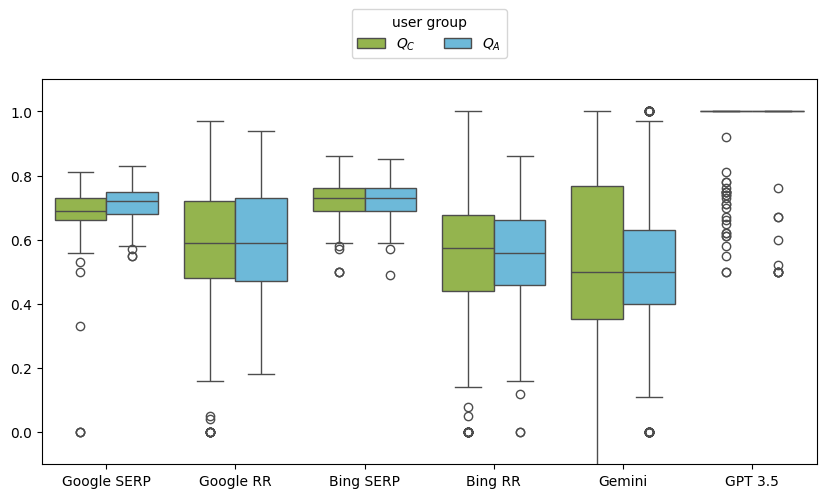

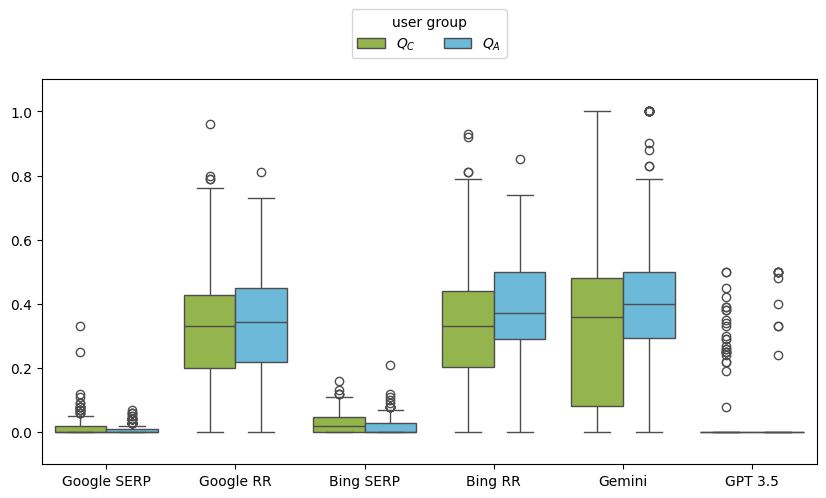

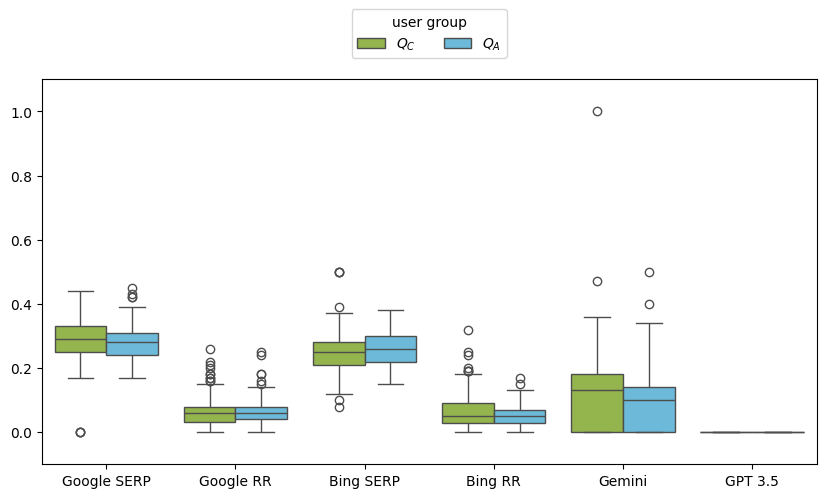


Avg para length scores ommitted from visualisation: 
                                query ngram  ratio_paras  ratio_list_items  \
261                      LETTER CODES     2         0.65              0.32   
376   missouri football schedule 2009     4         0.88              0.09   
2476                          support     1         0.38              0.60   

      ratio_headings  avg_para_len  num_sentences  avg_len  flesch    cli  \
261             0.03         25.12         390.80     4.19   51.37  13.50   
376             0.03          3.83         300.33     1.66   63.23  12.02   
2476            0.02          1.25          47.00     1.83   61.33  11.69   

      avg_concrete  concrete_ratio  abstract_ratio  undefined_ratio  \
261           2.50            0.03            0.23             0.74   
376           1.94            0.00            0.01             0.99   
2476          2.35            0.01            0.21             0.78   

     response_group response_group_type

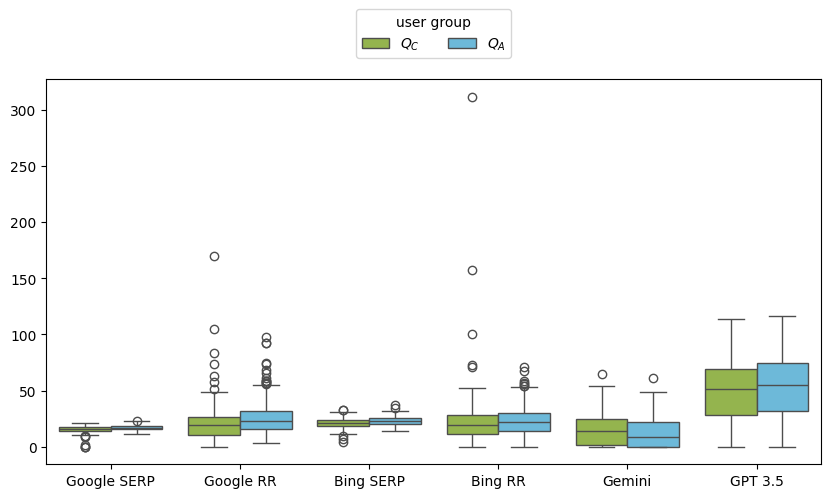

Number of sentences scores removed for visulisation: 
                query ngram  ratio_paras  ratio_list_items  ratio_headings  \
1093  hardcore fetish     2          1.0               0.0             0.0   

      avg_para_len  num_sentences  avg_len  flesch  cli  avg_concrete  \
1093          25.0            2.0     12.5   50.33  9.9           2.4   

      concrete_ratio  abstract_ratio  undefined_ratio response_group  \
1093            0.07            0.78             0.15         Gemini   

     response_group_type user group domain_specific  
1093             Chatbot      $Q_C$             NaN  


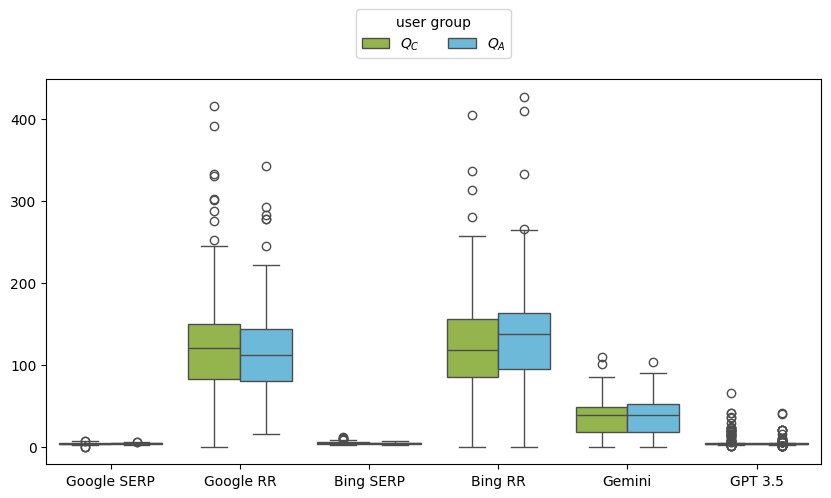

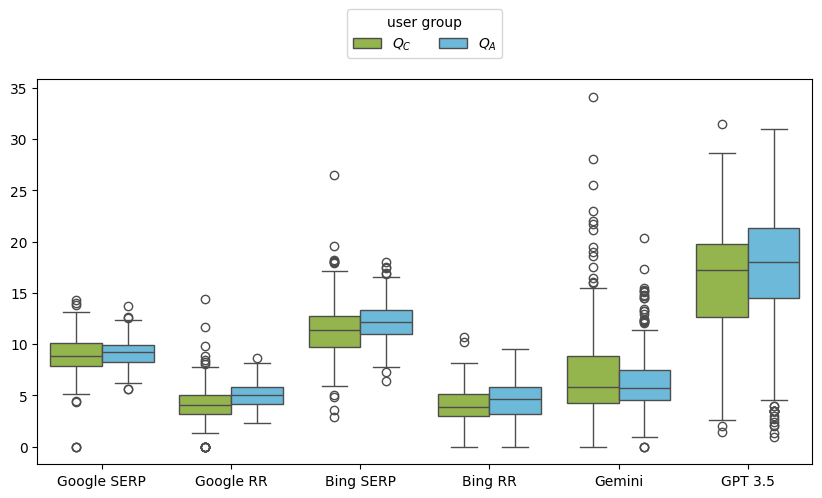

Flesch scores removed for visualisation: 
                     query ngram  ratio_paras  ratio_list_items  \
303  classic lotto numbers     3         0.44              0.48   

     ratio_headings  avg_para_len  num_sentences  avg_len  flesch   cli  \
303            0.08           9.2           77.5     2.87   74.17  9.08   

     avg_concrete  concrete_ratio  abstract_ratio  undefined_ratio  \
303           2.8            0.04             0.2             0.76   

    response_group response_group_type user group domain_specific  
303      Google RR                  RR      $Q_C$             NaN  


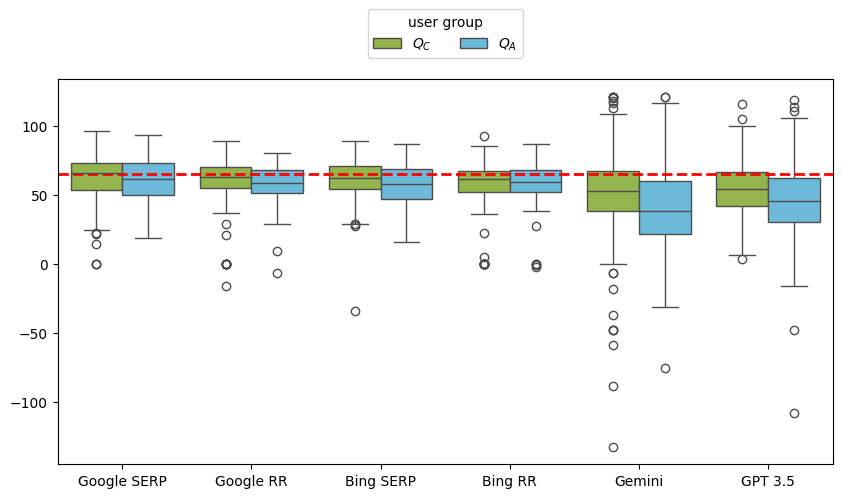

CLI scores removed for visulisation: 
                     query ngram  ratio_paras  ratio_list_items  \
303  classic lotto numbers     3         0.44              0.48   

     ratio_headings  avg_para_len  num_sentences  avg_len  flesch   cli  \
303            0.08           9.2           77.5     2.87   74.17  9.08   

     avg_concrete  concrete_ratio  abstract_ratio  undefined_ratio  \
303           2.8            0.04             0.2             0.76   

    response_group response_group_type user group domain_specific  
303      Google RR                  RR      $Q_C$             NaN  


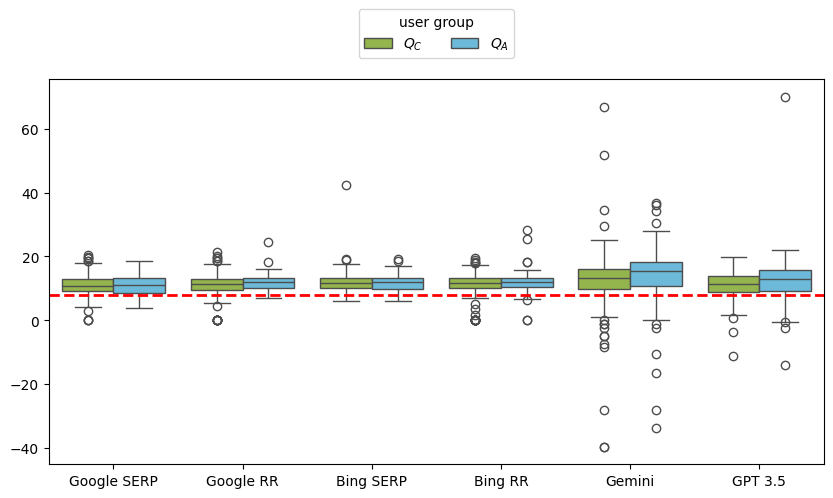

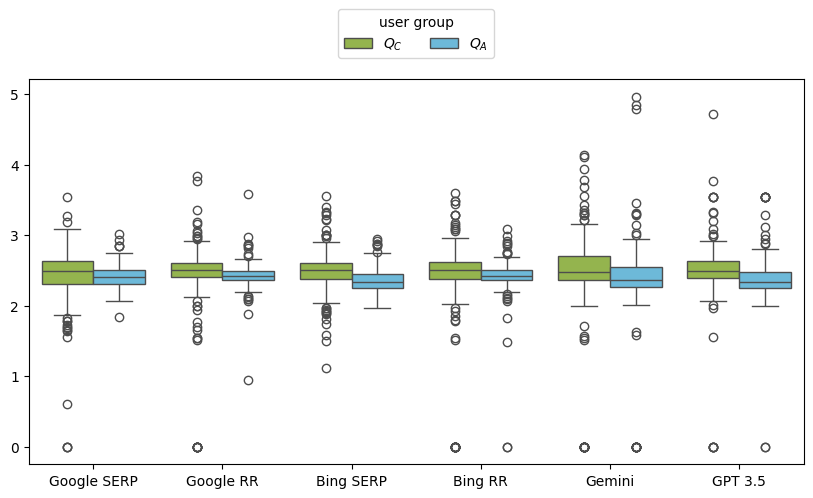

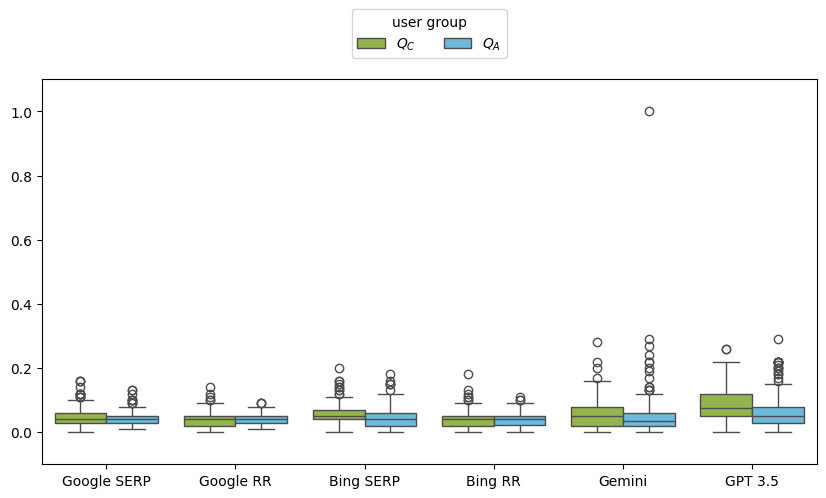

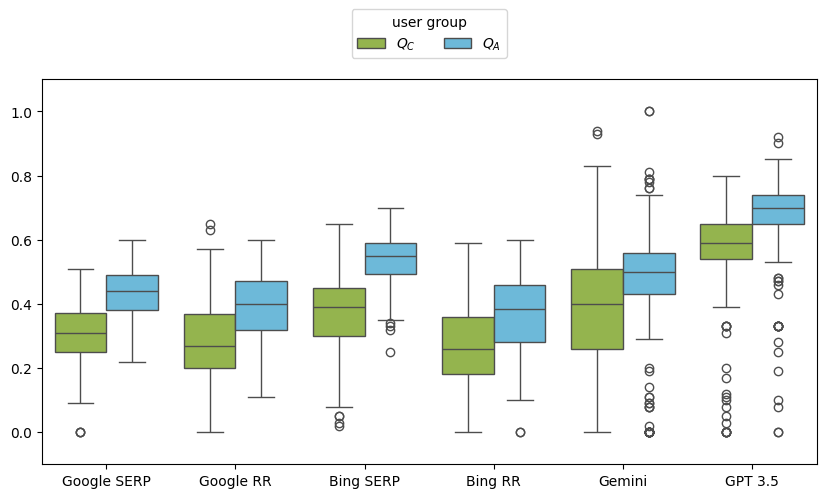

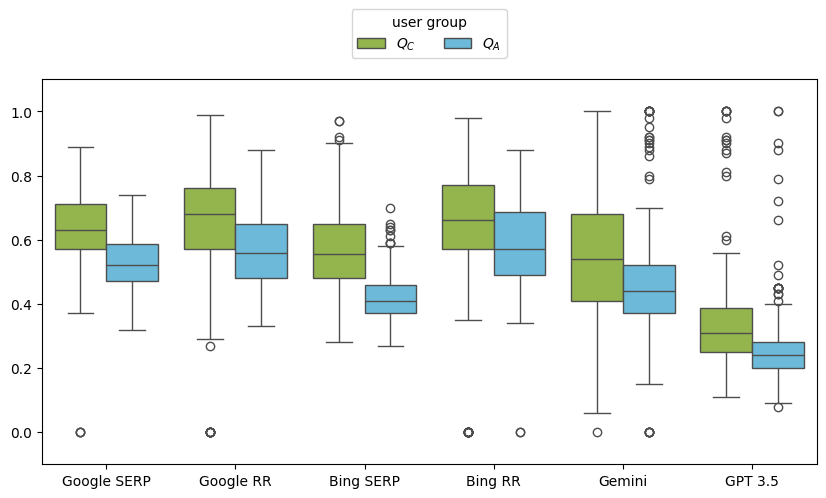

In [50]:
control_vs_target()

## Category Wise

In [4]:
import pandas as pd

bing_RR = pd.read_excel("../results/Bing_RR_merged.xlsx")
bing_snip = pd.read_excel("../results/Bing_SERP_merged.xlsx")
google_RR = pd.read_excel("../results/Google_RR_merged.xlsx")
google_snip = pd.read_excel("../results/Google_SERP_merged.xlsx")
gemini = pd.read_excel("../results/gemini_merged.xlsx")
gpt = pd.read_excel("../results/ChatGPT_merged.xlsx")

In [11]:
merged_df = pd.concat([google_snip, google_RR, bing_snip, bing_RR, gemini, gpt], ignore_index=True)
# merged_df = pd.concat([google_snip, google_RR, bing_snip, bing_RR], ignore_index=True)
merged_df["ngram_raw"] = [len(row["query"].split(" ")) for _,row in merged_df.iterrows()]
merged_df["ngram_raw"].dtype

dtype('int64')

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

df = pd.read_excel("../stats/QueryCategory_SignificanceTests.xlsx")
# df_ngram = df.loc[df["category_type"]=="ngram"][["group", "marker", "is_significant"]].pivot(index='marker', columns='group', values='is_significant')
df_ngram = df.loc[df["category_type"]=="ngram"][["group", "marker", "is_significant"]].pivot(index='group', columns='marker', values='is_significant')

fig = plt.figure()

sns.set_color_codes(palette='colorblind')
cmap_dict = {0: 'r', 1: 'g'}
cmap_labels = ['r', 'g']
cmap = ListedColormap([cmap_dict[i] for i in range(2)])
legend_handles = [
    Patch(color=cmap_labels[0], label='Non Significant Effect'), # red
    Patch(color=cmap_labels[1], label='Significant Effect'),  # green
    ]  
ax = sns.heatmap(df_ngram, cmap = cmap, linewidth=.5, square=True, vmin=-0.5, vmax=1.5, cbar=False)
# ax.hlines([i for i in range(8)], *ax.get_xlim(), colors=['k']*8)
# ax.vlines([i for i in range(14)], *ax.get_ylim(), colors=['k']*14)

# plt.title("Significance of Effect of query/prompt length \non Accessibility Indicator for response groups")
# plt.ylabel("Accessibility Indicator")
# plt.xlabel("Response Group")

plt.xlabel("Accessibility Indicator")
plt.ylabel("Response Group")

plt.xticks(rotation=45, ha='right')
plt.legend(handles=legend_handles, ncol=1, bbox_to_anchor=[1.2, 0.5], loc='lower center', fontsize=8, handlelength=.8)
plt.savefig("../figures/category/ngram/significance.pdf", dpi=300, bbox_inches='tight')
plt.close()

In [39]:
df_ngram = df.loc[(df["category_type"]=="ngram") & (df["is_significant"]==1)][["group", "marker", "test_stats"]].pivot(index='group', columns='marker', values='test_stats')

fig = plt.figure()
sns.set_color_codes(palette='colorblind')
# cmap_labels = ['r', 'g']
# cmap = ListedColormap([cmap_dict[i] for i in range(2)])
# legend_handles = [
#     Patch(color=cmap_labels[0], label='Non Significant Effect'), # red
#     Patch(color=cmap_labels[1], label='Significant Effect'),  # green
#     ]  
ax = sns.heatmap(df_ngram, linewidth=.5, square=True)

# plt.title("Effect of query/prompt length \non Accessibility Indicator for response groups")
# plt.ylabel("Accessibility Indicator")
# plt.xlabel("Response Group")

plt.xlabel("Accessibility Indicator")
plt.ylabel("Response Group")

plt.xticks(rotation=45, ha='right')
# plt.show()
# plt.legend(handles=legend_handles, ncol=1, bbox_to_anchor=[1.2, 0.5], loc='lower center', fontsize=8, handlelength=.8)
plt.savefig("../figures/category/ngram/correlation.pdf", dpi=300, bbox_inches='tight')
plt.close()

In [40]:
df_domain = df.loc[df["category_type"]=="domain_specific"][["group", "marker", "is_significant"]].pivot(index='group', columns='marker', values='is_significant')

fig = plt.figure()

sns.set_color_codes(palette='colorblind')
cmap_dict = {0: 'r', 1: 'g'}
cmap_labels = ['r', 'g']
cmap = ListedColormap([cmap_dict[i] for i in range(2)])
legend_handles = [
    Patch(color=cmap_labels[0], label='Non Significant Effect'), # red
    Patch(color=cmap_labels[1], label='Significant Effect'),  # green
    ]  
ax = sns.heatmap(df_domain, cmap = cmap, linewidth=.5, square=True, vmin=-0.5, vmax=1.5, cbar=False)

# plt.title("Significance of Effect of domain specificity \non Accessibility Indicator for response groups")
# plt.ylabel("Accessibility Indicator")
# plt.xlabel("Response Group")

plt.xlabel("Accessibility Indicator")
plt.ylabel("Response Group")

plt.xticks(rotation=45, ha='right')
plt.legend(handles=legend_handles, ncol=1, bbox_to_anchor=[1.2, 0.5], loc='lower center', fontsize=8, handlelength=.8)
plt.savefig("../figures/category/domain_specific/significance.pdf", dpi=300, bbox_inches='tight')
plt.close()

In [41]:
df_domain = df.loc[(df["category_type"]=="domain_specific") & (df["is_significant"]==1)][["group", "marker", "test_stats"]].pivot(index='group', columns='marker', values='test_stats')

fig = plt.figure()
sns.set_color_codes(palette='colorblind')
# cmap_labels = ['r', 'g']
# cmap = ListedColormap([cmap_dict[i] for i in range(2)])
# legend_handles = [
#     Patch(color=cmap_labels[0], label='Non Significant Effect'), # red
#     Patch(color=cmap_labels[1], label='Significant Effect'),  # green
#     ]  
ax = sns.heatmap(df_domain, linewidth=.5, square=True)

# plt.title("Effect of domain specificity \non Accessibility Indicator for response groups")
# plt.ylabel("Accessibility Indicator")
# plt.xlabel("Response Group")

plt.xlabel("Accessibility Indicator")
plt.ylabel("Response Group")

plt.xticks(rotation=45, ha='right')
# plt.show()
# plt.legend(handles=legend_handles, ncol=1, bbox_to_anchor=[1.2, 0.5], loc='lower center', fontsize=8, handlelength=.8)
plt.savefig("../figures/category/domain_specific/correlation.pdf", dpi=300, bbox_inches='tight')
plt.close()

### Accessibility Indicators

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

def category_plot_boxplot(data_df, marker, query_category, x_name, y_name, is_y_ratio):

    fig = plt.figure(figsize=(10, 4), dpi=300)
    
    if query_category == 'ngram':
        ax = sns.boxplot(x='response_group', y=marker, hue=query_category, data=data_df)
        sns.move_legend(ax, "center right", bbox_to_anchor=(1.15, 0.5))
    else:
        colors = ["#E7957D", "#8CB7A1"]
        # if marker == 'cli':
        #     data_df = data_df.loc[data_df['cli']>=0]
        ax = sns.boxplot(x='response_group', y=marker, hue=query_category, data=data_df, palette=sns.color_palette(colors))
        sns.move_legend(ax, "center right", bbox_to_anchor=(1.2, 0.5))

    if marker == 'cli':
        ax.axhline(8, ls='--', color='r')
    if marker == 'flesch':
        ax.axhline(65, ls='--', color='r')

    plt.xlabel(None)
    plt.ylabel(y_name)
    if is_y_ratio == True:
        plt.ylim(-0.1, 1.1)

    foldername = query_category
    filename = marker

    if not os.path.exists("../figures/category/" + foldername):
        os.makedirs("../figures/category/" + foldername)

    # plt.savefig("../figures/category/" + foldername + "/" + filename + ".pdf", dpi=300, bbox_inches='tight')
    # plt.close()

    plt.show()

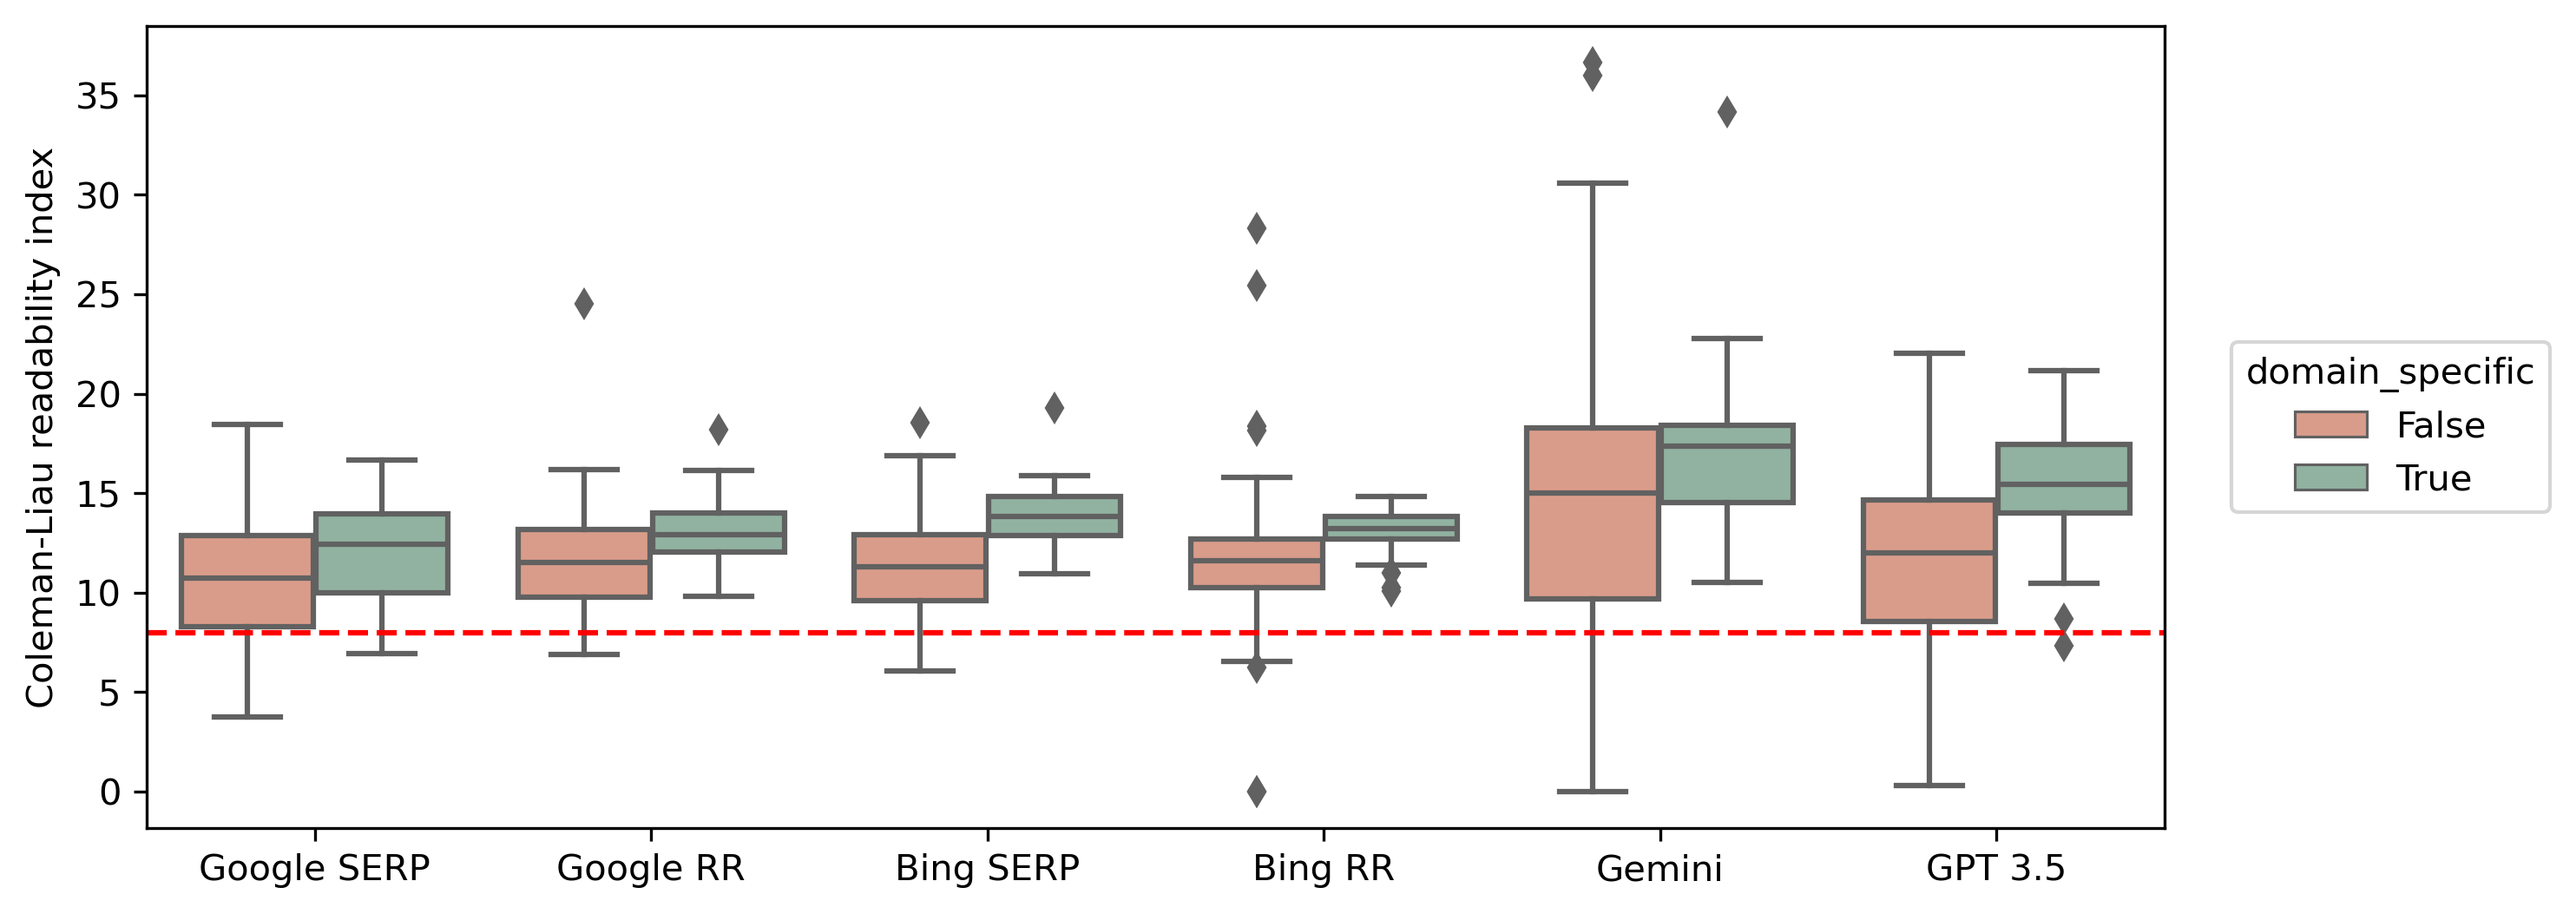

In [4]:
markers = [
        # "ratio_paras",
        # "ratio_list_items",
        # "ratio_headings",
        # "avg_para_len",
        # "num_sentences",
        # "avg_len",
        # "flesch",
        "cli",
        # "avg_concrete",
        # "concrete_ratio",
        # "abstract_ratio",
        # "undefined_ratio"
    ]

marker_names = [
        # "Ratio of paragraphs",
        # "Ratio of list items",
        # "Ratio of headings",
        # "Average paragraph length",
        # "Number of sentences",
        # "Average sentence length",
        # "Flesch Reading Ease score",
        "Coleman-Liau Readability index",
        # "Average Concreteness",
        # "Ratio of concrete words",
        # "Ratio of abstract words",
        # "Ratio of non-rated words"
    ]

y_names = [
        # "Ratio of paragraphs",
        # "Ratio of list items",
        # "Ratio of headings",
        # "Average paragraph length",
        # "Number of sentences",
        # "Average sentence length",
        # "Flesch reading ease score",
        "Coleman-Liau readability index",
        # "Average Concreteness",
        # "Ratio of concrete words",
        # "Ratio of abstract words",
        # "Ratio of non-rated words"
    ]

ratios = [
    "Ratio of paragraphs",
    "Ratio of list items",
    "Ratio of headings",
    "Ratio of concrete words",
    "Ratio of abstract words",
    "Ratio of non-rated words"
]

for category in [
    # 'ngram', 
    'domain_specific'
    ]:
    for marker, marker_name, yname in zip(markers, marker_names, y_names):
        if marker_name in ratios:
            is_marker_ratio = True
        else:
            is_marker_ratio = False
        if marker == 'cli':
            idx = merged_df.loc[(merged_df['response_group_type']=='Chatbot') & (merged_df['cli'] > 40)].index
            data_df = merged_df.drop(idx)
        elif marker == 'avg_para_len':
            idx = merged_df.loc[(merged_df['response_group']=='Bing RR') & (merged_df['avg_para_len']>=500)].index
            data_df = merged_df.drop(idx)
        else:
            data_df = merged_df
        if category == 'ngram':
            unigram = data_df.loc[data_df["ngram"]=='1']
            bigram = data_df.loc[data_df["ngram"]=='2']
            trigram = data_df.loc[data_df["ngram"]=='3']
            quadgram = data_df.loc[data_df["ngram"]=='4']
            ngram = data_df.loc[data_df["ngram"]=='>4']
            data_df = pd.concat([unigram, bigram, trigram, quadgram, ngram])
        category_plot_boxplot(data_df=data_df, query_category=category, marker = marker, x_name="response group", y_name = yname, is_y_ratio=is_marker_ratio)

## Query reformulation

### RBO and ROUGE-L

p_value:  0.09883162005836
Google RBO median:  0.03
Bing RBO median:  0.0


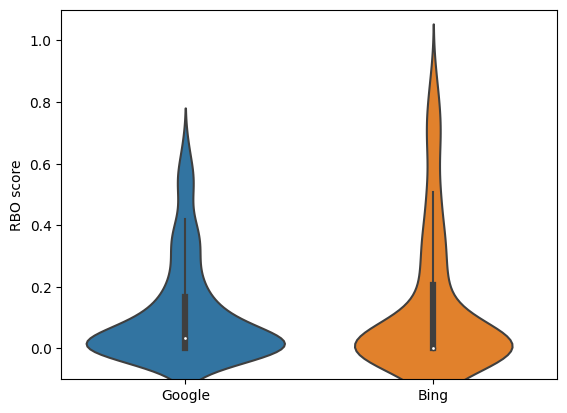

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

google_rbo = pd.read_excel("../results/Google_RBO.xlsx")
bing_rbo = pd.read_excel("../results/Bing_RBO.xlsx")
google_rbo["Search Engine"] = ["Google"] * len(google_rbo)
bing_rbo["Search Engine"] = ["Bing"] * len(bing_rbo)
# shapiro_google = stats.shapiro(google_rbo["rbo"])[1]
# shapiro_bing = stats.shapiro(bing_rbo["rbo"])[1]
# if shapiro_google < 0.05 or shapiro_bing < 0.05:
#     # print("one or both distributions are not normally distributed")
#     test_name = "Mann Whitney U test"
#     p_value = stats.mannwhitneyu(google_rbo["rbo"], bing_rbo["rbo"])[1]
# else:
#     # print("both distributions are normally distributed")
test_name = "T-Test"
p_value = stats.ttest_ind(google_rbo["rbo"], bing_rbo["rbo"])[1]

fig = plt.figure()
merged_rbo = pd.concat([google_rbo, bing_rbo], ignore_index=True)
ax = sns.violinplot(x="Search Engine", y="rbo", data=merged_rbo)
ax.set_ylabel("RBO score")
ax.set_xlabel(None)
ax.set_ylim(-0.1, 1.1)
print("p_value: ", p_value)
print("Google RBO median: ", round(np.median(google_rbo["rbo"].to_numpy()), 2))
print("Bing RBO median: ", round(np.median(bing_rbo["rbo"].to_numpy()), 2))
# if p_value < 0.01:
#     title =" RBO value distribution for responses generated for \noriginal and reformulated queries" + " **"
# elif p_value < 0.05:
#     title = "RBO value distribution for responses generated for \noriginal and reformulated queries" + " *"
# else:
#     title = "RBO value distribution for responses generated for \noriginal and reformulated queries"
# ax.set_title(title)
# ax.set_title("RBO value distribution for responses generated for \noriginal and reformulated queries (p-value: {}, test: {})".format(round(p_value,4), test_name))
plt.savefig("../figures/QueryReformed/rbo.pdf", dpi=300, bbox_inches='tight')
plt.show()

p_value:  5.889203369021928e-14
Gemini ROUGE-L median:  0.15
GPT 3.5 ROUGE-L median:  0.22


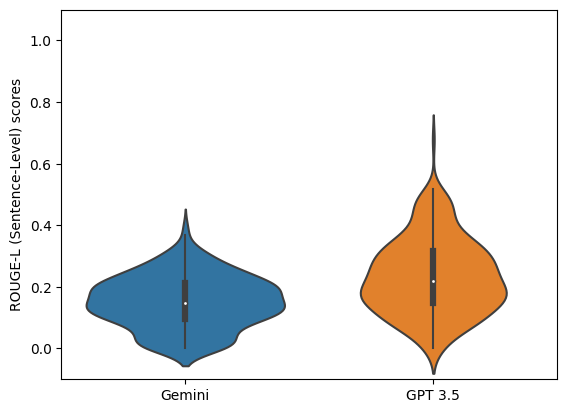

p_value:  0.001529618759481742
Gemini ROUGE-Lsum median:  0.28
GPT 3.5 ROUGE-Lsum median:  0.34


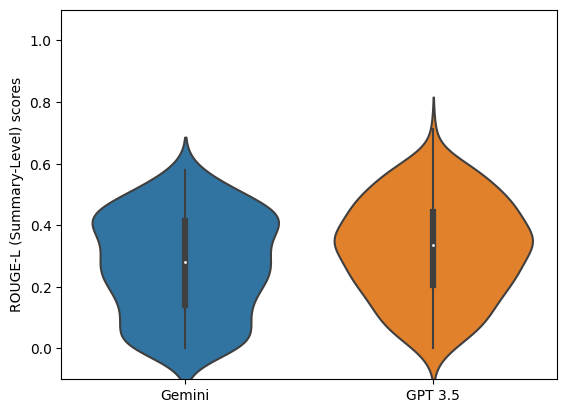

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

gemini_rouge = pd.read_excel("../results/Gemini_rougeL.xlsx")
gpt_rouge = pd.read_excel("../results/ChatGPT_rougeL.xlsx")
gemini_rouge["Chatbot"] = ["Gemini"] * len(gemini_rouge)
gpt_rouge["Chatbot"] = ["GPT 3.5"] * len(gpt_rouge)

# shapiro_gemini = stats.shapiro(gemini_rouge["rougeL"])[1]
# shapiro_gpt = stats.shapiro(gpt_rouge["rougeL"])[1]
# if shapiro_gemini < 0.05 or shapiro_gpt < 0.05:
#     # print("one or both distributions are not normally distributed")
#     test_name = "Mann Whitney U test"
#     p_value = stats.mannwhitneyu(gemini_rouge["rougeL"], gpt_rouge["rougeL"])[1]
# else:
# print("both distributions are normally distributed")
test_name = "T-Test"
p_value = stats.ttest_ind(gemini_rouge["rougeL"], gpt_rouge["rougeL"])[1]

merged_rbo = pd.concat([gemini_rouge, gpt_rouge], ignore_index=True)
print("p_value: ", p_value)
print("Gemini ROUGE-L median: ", round(np.median(gemini_rouge['rougeL']), 2))
print("GPT 3.5 ROUGE-L median: ", round(np.median(gpt_rouge['rougeL']), 2))

ax = sns.violinplot(x="Chatbot", y="rougeL", data=merged_rbo)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("ROUGE-L (Sentence-Level) scores")
ax.set_xlabel(None)

# if p_value < 0.01:
#         title = "RougeL (Sentence-Level) value distribution \nfor responses generated for original and reformulated queries" + " **"
# elif p_value < 0.05:
#     title = "RougeL (Sentence-Level) value distribution \nfor responses generated for original and reformulated queries" + " *"
# else:
#     title = "RougeL (Sentence-Level) value distribution \nfor responses generated for original and reformulated queries"

# ax.set_title(title)

# ax.set_title("RougeL (Sentence-Level) value distribution \nfor responses generated for original and reformulated queries \n(p-value: {}, test: {})".format(p_value, test_name))
plt.savefig("../figures/QueryReformed/rougeL.pdf", dpi=300, bbox_inches='tight')
plt.show()

# shapiro_gemini = stats.shapiro(gemini_rouge["rougeLsum"])[1]
# shapiro_gpt = stats.shapiro(gpt_rouge["rougeLsum"])[1]
# if shapiro_gemini < 0.05 or shapiro_gpt < 0.05:
#     # print("one or both distributions are not normally distributed")
#     test_name = "Mann Whitney U test"
#     p_value = stats.mannwhitneyu(gemini_rouge["rougeLsum"], gpt_rouge["rougeLsum"])[1]
# else:
# print("both distributions are normally distributed")
test_name = "T-Test"
p_value = stats.ttest_ind(gemini_rouge["rougeLsum"], gpt_rouge["rougeLsum"])[1]

merged_rbo = pd.concat([gemini_rouge, gpt_rouge], ignore_index=True)
print("p_value: ", p_value)
print("Gemini ROUGE-Lsum median: ", round(np.median(gemini_rouge['rougeLsum']), 2))
print("GPT 3.5 ROUGE-Lsum median: ", round(np.median(gpt_rouge['rougeLsum']), 2))
ax = sns.violinplot(x="Chatbot", y="rougeLsum", data=merged_rbo)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("ROUGE-L (Summary-Level) scores")
ax.set_xlabel(None)

# if p_value < 0.01:
#         title = "RougeL (Summary-Level) value distribution \nfor responses generated for original and reformulated queries" + " **"
# elif p_value < 0.05:
#     title = "RougeL (Summary-Level) value distribution \nfor responses generated for original and reformulated queries" + " *"
# else:
#     title = "RougeL (Summary-Level) value distribution \nfor responses generated for original and reformulated queries"

# ax.set_title(title)

# ax.set_title("RougeL (Summary-Level) value distribution \nfor responses generated for original and reformulated queries \n(p-value: {}, test: {})".format(p_value, test_name))
plt.savefig("../figures/QueryReformed/rougeLsum.pdf", dpi=300,bbox_inches='tight')
plt.show()

### Accessibility Indicators

In [51]:
import pandas as pd
import re 

bing_RR = pd.read_excel("../results/Bing_RR_merged.xlsx")
bing_RR["Query Type"] = ["Original Query"]*len(bing_RR)
bing_snip = pd.read_excel("../results/Bing_SERP_merged.xlsx")
bing_snip["Query Type"] = ["Original Query"]*len(bing_RR)
google_RR = pd.read_excel("../results/Google_RR_merged.xlsx")
google_RR["Query Type"] = ["Original Query"]*len(bing_RR)
google_snip = pd.read_excel("../results/Google_SERP_merged.xlsx")
google_snip["Query Type"] = ["Original Query"]*len(bing_RR)
gemini = pd.read_excel("../results/gemini_merged.xlsx")
gemini["Query Type"] = ["Original Query"]*len(bing_RR)
gpt = pd.read_excel("../results/ChatGPT_merged.xlsx")
gpt["Query Type"] = ["Original Query"]*len(bing_RR)

google_reformed_RR = pd.read_excel("../results/Google_QueryReformed_RR_merged.xlsx")
google_reformed_RR["Query Type"] = ["Reformed Query"]*len(bing_RR)
google_reformed_snip = pd.read_excel("../results/Google_QueryReformed_SERP_merged.xlsx")
google_reformed_snip["Query Type"] = ["Reformed Query"]*len(bing_RR)
bing_reformed_RR = pd.read_excel("../results/Bing_QueryReformed_RR_merged.xlsx")
bing_reformed_RR["Query Type"] = ["Reformed Query"]*len(bing_RR)
bing_reformed_snip = pd.read_excel("../results/Bing_QueryReformed_SERP_merged.xlsx")
bing_reformed_snip["Query Type"] = ["Reformed Query"]*len(bing_RR)
gemini_reformed = pd.read_excel("../results/Gemini_QueryReformed_merged.xlsx")
gemini_reformed["Query Type"] = ["Reformed Query"]*len(bing_RR)
gpt_reformed = pd.read_excel("../results/ChatGPT_QueryReformed_merged.xlsx")
gpt_reformed["Query Type"] = ["Reformed Query"]*len(bing_RR)

In [52]:
merged_df = pd.concat([google_snip, google_RR, bing_snip, bing_RR, gemini, gpt, google_reformed_snip, google_reformed_RR, bing_reformed_snip, bing_reformed_RR, gemini_reformed, gpt_reformed], ignore_index=True)
merged_df["response_group"] = [re.sub(" Reformed", "", response_group_name) for response_group_name in merged_df["response_group"]]
merged_df.head()

,query,ngram,domain_specific,ratio_paras,ratio_list_items,ratio_headings,avg_para_len,num_sentences,avg_len,flesch,cli,avg_concrete,concrete_ratio,abstract_ratio,undefined_ratio,response_group,response_group_type,Query Type
0,adhd,1,True,0.68,0.00,0.32,16.00,3.71,9.87,28.06,16.30,2.32,0.03,0.41,0.56,Google SERP,SERP,Original Query
1,adult,1,False,0.64,0.00,0.36,13.22,3.00,9.43,65.69,10.67,2.43,0.07,0.35,0.58,Google SERP,SERP,Original Query
2,age,1,False,0.70,0.00,0.30,16.19,4.12,9.08,44.93,13.36,2.39,0.02,0.45,0.53,Google SERP,SERP,Original Query
3,anxiety,1,False,0.75,0.00,0.25,15.94,4.33,7.83,42.54,12.88,2.19,0.02,0.49,0.49,Google SERP,SERP,Original Query
4,asd,1,False,0.59,0.02,0.39,13.00,2.88,10.16,46.14,15.00,2.14,0.01,0.40,0.59,Google SERP,SERP,Original Query


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_boxplot_gen(x, y, x_groups, x_name, y_name, foldername, is_y_ratio):

    data_df = merged_df.loc[merged_df[x] == x_groups[0]]
    for i in range(1, len(x_groups)):
        temp = merged_df.loc[merged_df[x]==x_groups[i]]
        data_df = pd.concat([data_df, temp])

    if y == 'avg_para_len':
        if "Bing RR" in x_groups or "RR" in x_groups:
            idx = data_df.loc[(data_df['response_group_type']=='RR') & (data_df['avg_para_len']>=500)].index
            data_df = data_df.drop(idx)
            print(idx)
    elif y== 'cli':
        if "GPT 3.5" in x_groups or "Chatbot" in x_groups:
            idx = data_df.loc[(data_df["response_group_type"]=="Chatbot") & (data_df['cli'] > 40)].index
            data_df = data_df.drop(idx)
            print(idx)
        
    fig = plt.figure(figsize=(10,5))
    colors = ["#FEC53E", "#596BB0"]
    ax = sns.violinplot(x=x, hue="Query Type", y=y, data=data_df, palette=sns.color_palette(colors))
    if is_y_ratio == True:
        ax.set_ylim(-0.1, 1.1)

    if y == 'cli':
        ax.axhline(8, ls='--', color='r')
    if y == 'flesch':
        ax.axhline(65, ls='--', color='r')

    new_labels = {
        "Original Query": "$Q_A$",
        "Reformed Query": "$Q_A'$ or $P_A'$"
    }
    
    new_labels = ["$Q_A$", "$Q_A'$"]
    handles, previous_labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=new_labels)
        
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    # loc='upper center', bbox_to_anchor=(0.5, 1.05)
    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
     
    if not os.path.exists("../figures/QueryVariation/" + foldername):
        os.makedirs("../figures/QueryVariation/" + foldername)

    plt.savefig("../figures/QueryVariation/" + foldername + "/" + y + ".pdf", dpi=300, bbox_inches='tight')
    # plt.close()
    plt.show()

def pairwise_comparison(x_val, pair, pair_name, folder_name=None):
    markers = [
        "ratio_paras",
        "ratio_list_items",
        "ratio_headings",
        "avg_para_len",
        "num_sentences",
        "avg_len",
        "flesch",
        "cli",
        "avg_concrete",
        "concrete_ratio",
        "abstract_ratio",
        "undefined_ratio"
    ]

    marker_names = [
        "Ratio of paragraphs",
        "Ratio of list items",
        "Ratio of headings",
        "Average paragraph length",
        "Number of sentences",
        "Average sentence length",
        "Flesch Reading Ease score",
        "Coleman-Liau Readability index",
        "Average Concreteness",
        "Ratio of concrete words",
        "Ratio of abstract words",
        "Ratio of non-rated words"
    ]

    ratios = [
        "Ratio of paragraphs",
        "Ratio of list items",
        "Ratio of headings",
        "Ratio of concrete words",
        "Ratio of abstract words",
        "Ratio of non-rated words"
    ]

    for marker, marker_name in zip(markers, marker_names):
        if folder_name == None:
            folder_name = "_".join(["_".join(group.split()) for group in pair])
        if marker_name in ratios:
            is_marker_ratio = True
        else:
            is_marker_ratio = False
        plot_boxplot_gen(x = x_val, y = marker, x_groups = pair, x_name = pair_name, y_name = marker_name, foldername = folder_name, is_y_ratio=is_marker_ratio)

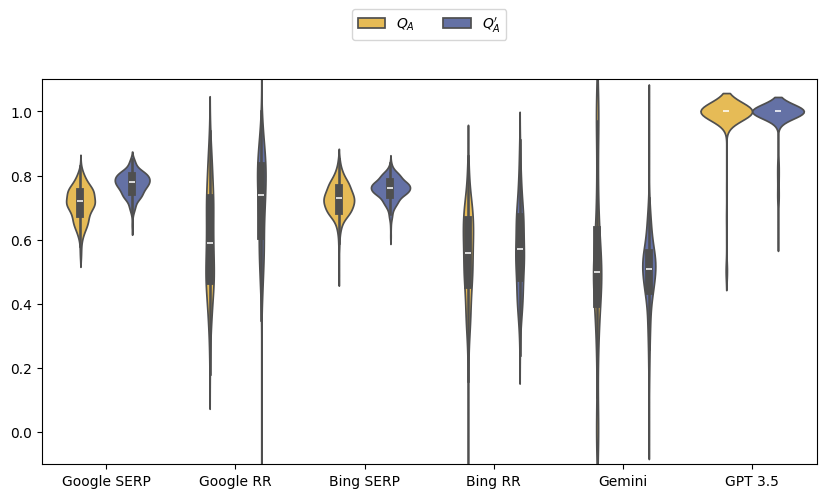

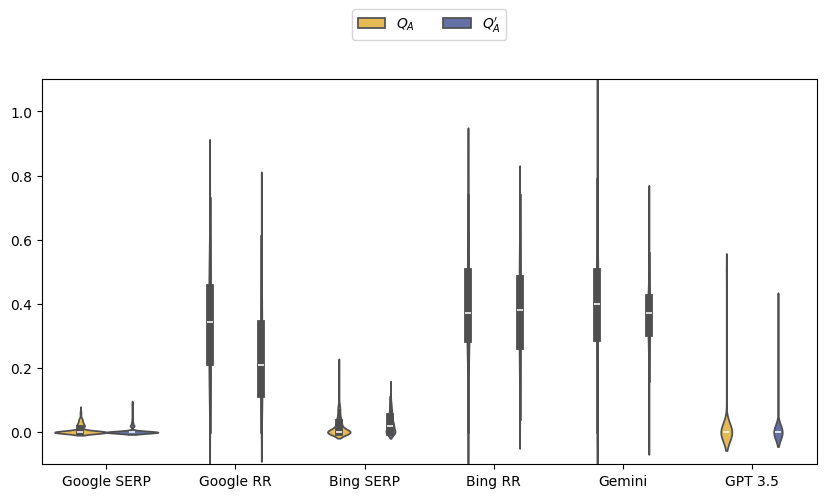

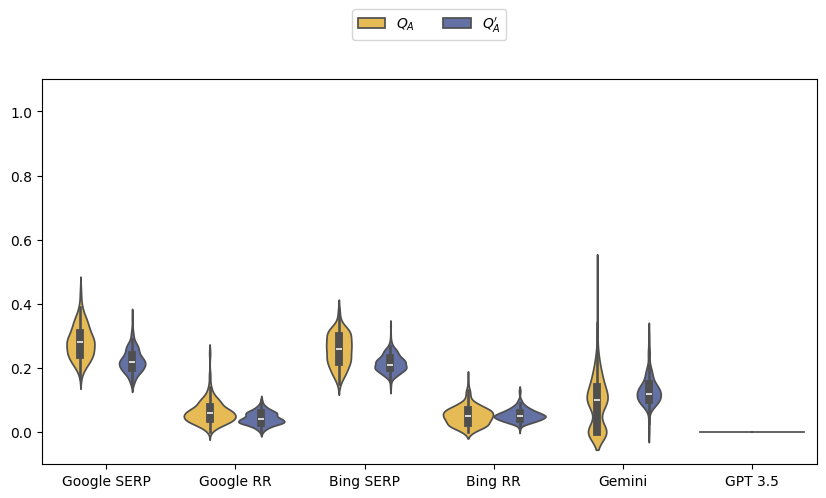

Index([973], dtype='int64')


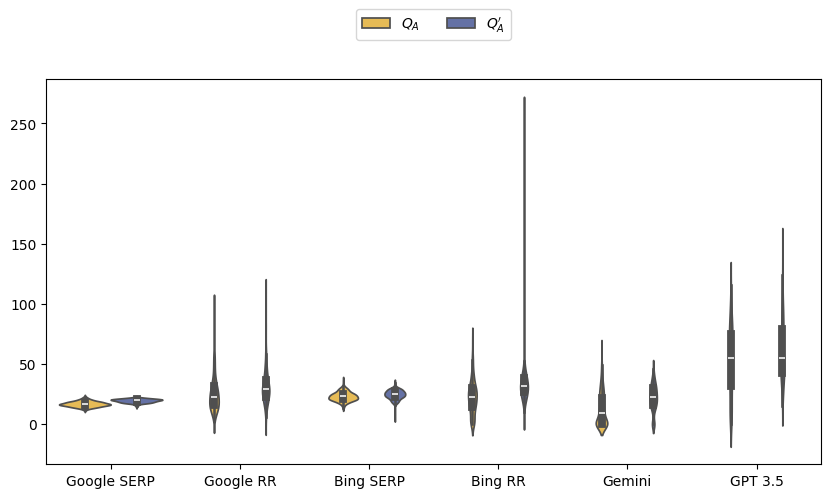

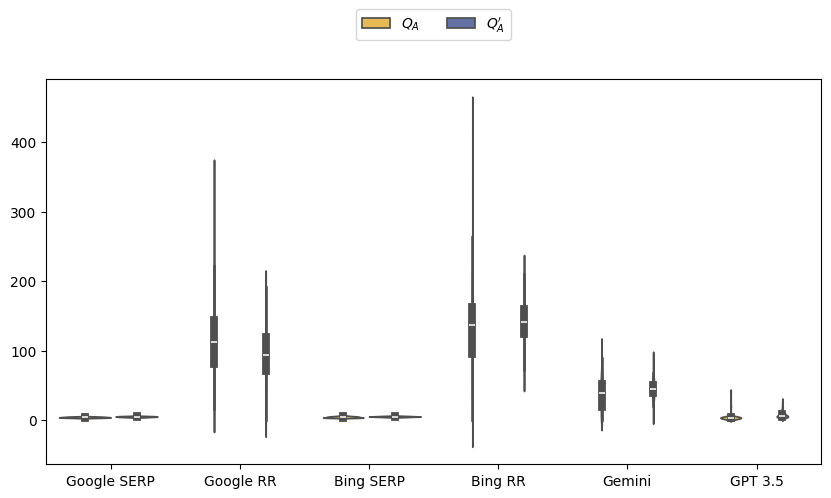

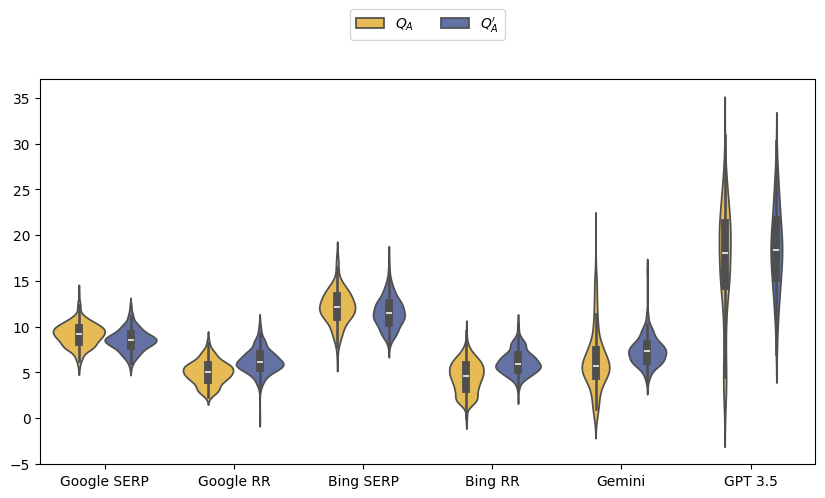

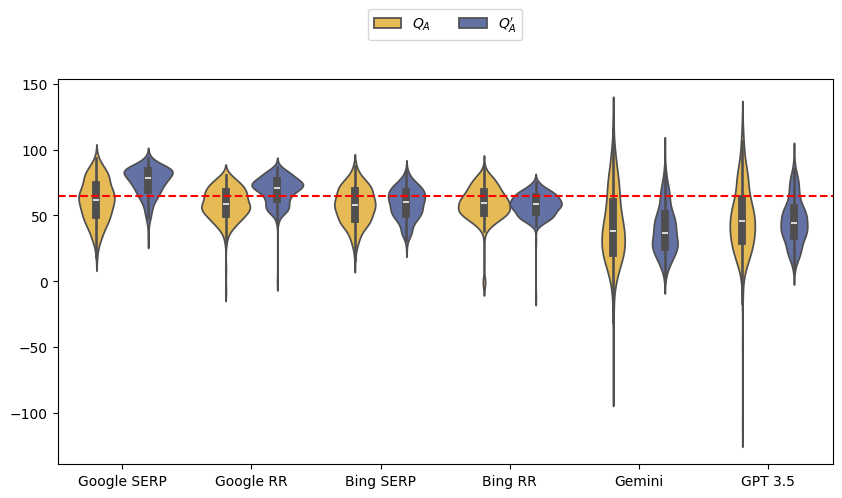

Index([1407], dtype='int64')


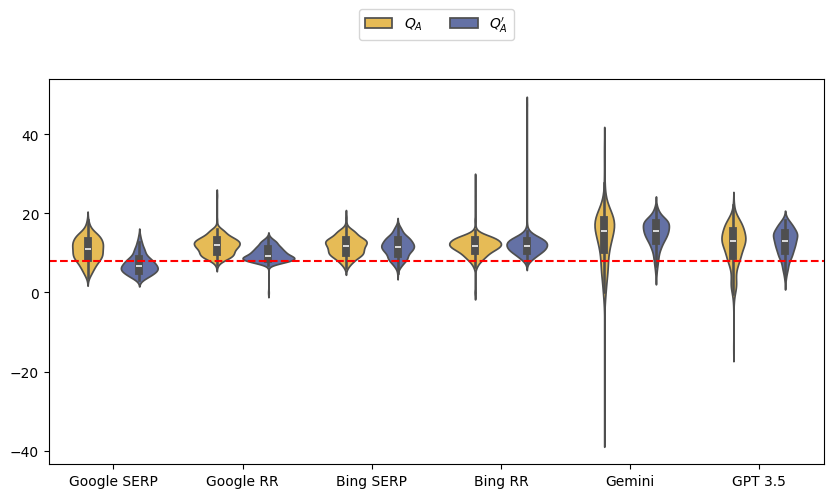

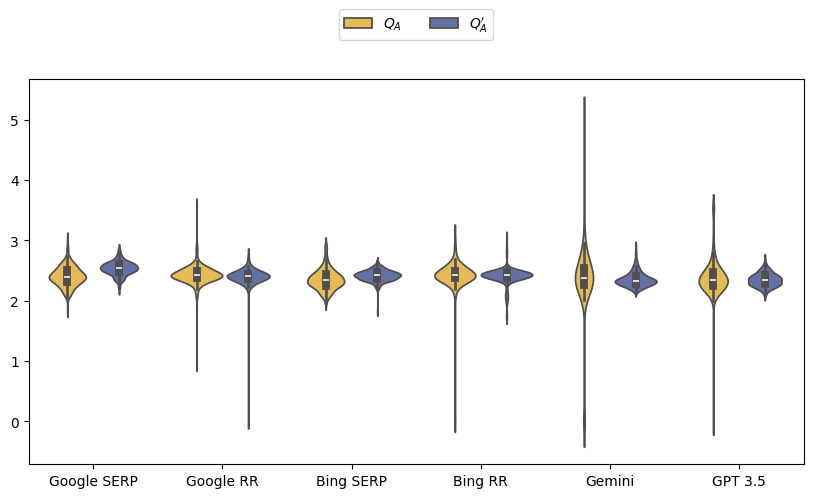

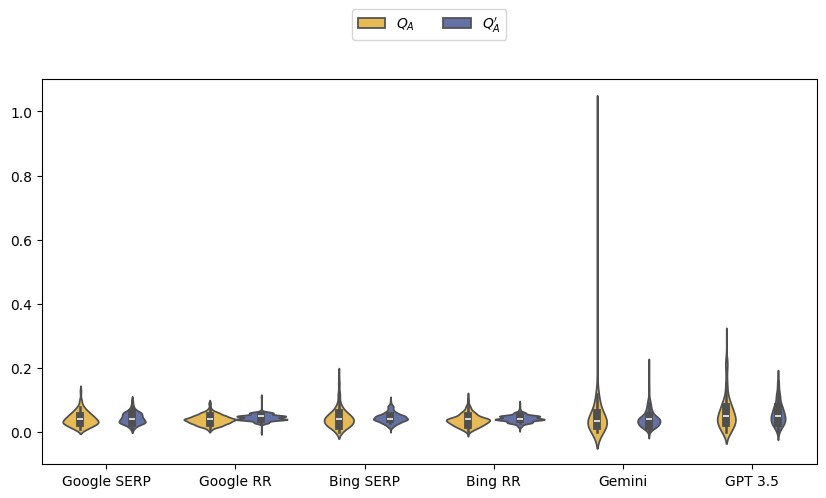

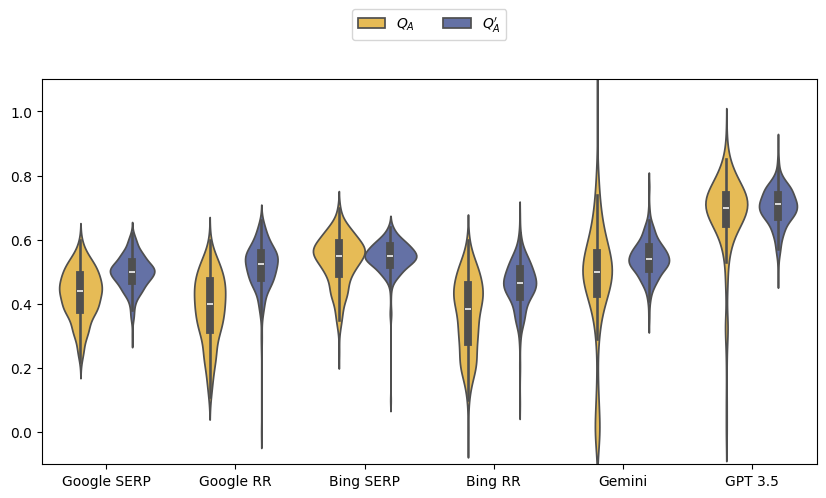

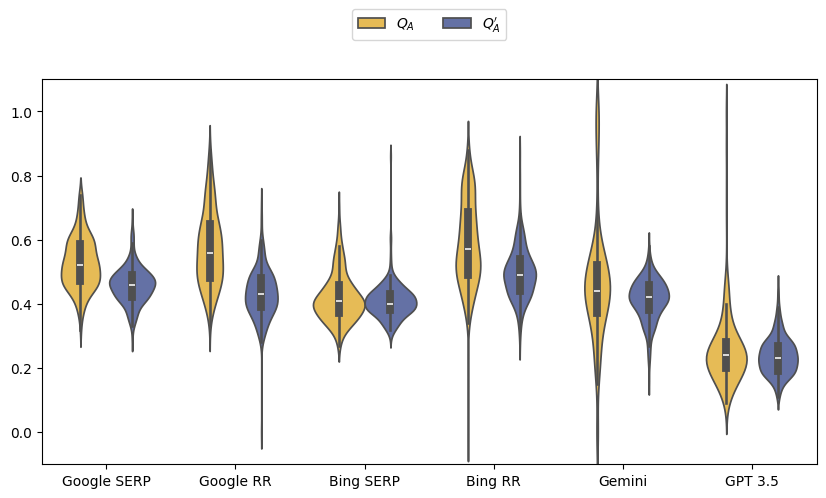

In [80]:
pairwise_comparison(x_val = 'response_group', pair=["Google SERP", "Google RR", "Bing SERP", "Bing RR", "Gemini", "GPT 3.5"], pair_name="Google SERP and Bing SERP: Original Prompt v/s Reformed Prompt", folder_name="Google_Bing_SERP")